<a href="https://colab.research.google.com/github/lugalois/CExercises/blob/master/Integraci%C3%B3nNumerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Menú Integración Numérica

************ INDICACIONES DE USO ************

- Ejecute primero el código de la sección módulos
- Luego ejecute los demás códigos de las demás secciones en orden, desde "Inicio Programa - Bienvenida" hasta "Lógica de programación"

#Inicio Programa - Bienvenida
En la siguiente celda se recopila los datos a procesar.

In [5]:
def data():
  fx=input("Ingrese la función:  f(x) = ")
  x = symbols('x')
  fx = lambdify(x, S(fx))
  a=int(input("Extremo Inferior: "))
  b=int(input("Extremo Superior: "))  
  n=int(input("Número de Particiones (N): "))
  lista=[fx,a,b,n]
  return lista

La persona verá un menú de inicio, donde tiene diferentes opciones (A, B, C, D) según el cálculo que quiera realizar.

In [6]:
def print_welcome():
  print("\n"+"*"*90)
  print("*                               Menú integración Numérica                                *".upper())
  print("*"*90)
  print("*"*90)
  print('*(A)Valor "Exacto" de la integral                                                        *')
  print('*(B)Aproximación por sumas superiores, inferiores, punto medio, a derecha y a izquierda. *')
  print('*(C)Regla del Trapecio (Con error de estimación)                                         *')
  print('*(D)Regla de Simpson (Con error de estimación)                                           *')
  print('*(E)Parábola de Riemann                                                                  *')
  print('*(F)Salir                                                                                *')
  print("*"*90)
  print("\n")
print_welcome()


******************************************************************************************
*                               MENÚ INTEGRACIÓN NUMÉRICA                                *
******************************************************************************************
******************************************************************************************
*(A)Valor "Exacto" de la integral                                                        *
*(B)Aproximación por sumas superiores, inferiores, punto medio, a derecha y a izquierda. *
*(C)Regla del Trapecio (Con error de estimación)                                         *
*(D)Regla de Simpson (Con error de estimación)                                           *
*(E)Parábola de Riemann                                                                  *
*(F)Salir                                                                                *
*****************************************************************************************

#Módulos


> Para la realización del programa se utilizaron los siguientes módulos.



In [2]:
from sympy import  S, symbols #modulos para str to function
from sympy.utilities.lambdify import lambdify #modulos para str to function
from matplotlib.patches import Polygon #GRAFICAS
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt #GRAFICAS

#Valor "Exacto" De La Integral
En la siguiente celda de código se muestra como obtenemos el valor "exacto" de la integral usando el módulo scipy y la función quad().

In [7]:
def valueIntegral(fx,a,b):
  integral = integrate.quad(fx,a,b)
  return integral[0]

> Código de la representación visual de la integral; también se hace uso de esta función para graficar la integral por la regla de Simpson



In [8]:
def integralGraphics(fx,a,b,l,N):
  
  x = np.linspace(a, b)
    
  
  fig, ax = plt.subplots()
  ax.plot(x, fx(x), 'b', linewidth=3)
  ax.set_ylim(bottom=0)

  # Region sombreada
  ix = np.linspace(a, b)
  iy = fx(ix)
  verts = [(a, 0), *zip(ix, iy), (b, 0)]
  poly = Polygon(verts, edgecolor='b', alpha=0.2)
  ax.add_patch(poly)
  
  fig.text(0.9, 0.05, '$x$')
  fig.text(0.1, 0.9, '$y$')

  if l == "a":
    plt.title('Representación visual de la integral')
  else:
    plt.title('Regla de Simpson, con N = {}'.format(N))

  plt.show()

#Sumas de Riemann 

En la siguiente celda de código se grafica la aproximación de la integral por sumas superiores, inferiores, punto medio, a derecha y a izquierda.

In [9]:
def sRiemann(fx,a,b,N):
  n = 10 
  x = np.linspace(a,b,N+1)
  y = fx(x)

  X = np.linspace(a,b,n*N+1)
  Y = fx(X)

  plt.figure(figsize=(15,5))

  plt.subplot(1,3,1)
  plt.plot(X,Y,'b')
  x_left = x[:-1]
  y_left = y[:-1]
  plt.plot(x_left,y_left,'b.',markersize=10)
  plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
  plt.title('Suma de Riemann por Izquierda , N = {}'.format(N))  
  plt.xlabel("Suma = {}".format(riemannSum(fx,a,b,N,"left")))

  plt.subplot(1,3,2)
  plt.plot(X,Y,'b')
  x_mid = (x[:-1] + x[1:])/2 
  y_mid = fx(x_mid)
  plt.plot(x_mid,y_mid,'b.',markersize=10)
  plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
  plt.title('Suma de Riemann Punto Medio, N = {}'.format(N))
  plt.xlabel("Suma = {} ".format(riemannSum(fx,a,b,N,"right")))

  plt.subplot(1,3,3)
  plt.plot(X,Y,'b')
  x_right = x[1:] 
  y_right = y[1:]
  plt.plot(x_right,y_right,'b.',markersize=10)
  plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
  plt.title('Suma de Riemann por Derecha, N = {}'.format(N))
  plt.xlabel("Suma = {}".format(riemannSum(fx,a,b,N,"midpoint")))

  plt.show()



> Calculo de sumas de Riemann



In [10]:
def riemannSum(fx,a,b,N,method):
  dx = (b - a)/N
  x = np.linspace(a,b,N+1)

  if method == 'left':
      x_left = x[:-1]
      return np.sum(fx(x_left)*dx)
  elif method == 'right':
      x_right = x[1:]
      return np.sum(fx(x_right)*dx)
  elif method == 'midpoint':
      x_mid = (x[:-1] + x[1:])/2
      return np.sum(fx(x_mid)*dx)

#Regla del Trapecio (Con error de estimación)


> Valor aproximado regla del trapecio



In [11]:
def t_n(fx,a,b,n):
  x = np.linspace(a,b,n+1) 
  y = fx(x)
  y_right = y[1:] 
  y_left = y[:-1]
  dx = (b - a)/n
  T = (dx/2) * np.sum(y_right + y_left)
  return T

> Grafica regla del trapecio y su valor

In [12]:
def graphicRt(fx,a,b,N):
  fig, ax = plt.subplots()
  x = np.linspace(a,b,N+1)
  
  X = np.linspace(a,b,100)
  Y = fx(X)
  plt.plot(X,Y)

  for i in range(N):
      xs = [x[i],x[i],x[i+1],x[i+1]]
      ys = [0,fx(x[i]),fx(x[i+1]),0]
      plt.fill(xs,ys,edgecolor='k',alpha=0.9,linewidth=4)
  
  fig.text(0.9, 0.05, '$x$')
  fig.text(0.1, 0.9, '$y$')
  
  plt.title('Regla del trapecio, con N = {}'.format(N))
  plt.show()

  print(f"El valor de la integral por la regla del trapecio es T_{N} = {t_n(fx,a,b,N)}")



> Error de estimación regla del trapecio



In [13]:
def estimationErrorRt(fx,a,b,n):
  I= (t_n(fx,a,b,n)- valueIntegral(fx,a,b))/valueIntegral(fx,a,b)
  print(f"Error de estimación: {np.abs(I - t_n(fx,a,b,n))}")

#Regla de Simpson (Con error de estimación)
Valor de la integral usando la regla de Simpson.

In [14]:
def simpsRule(f,a,b,N):
  if N % 2 == 1:
    print("N debe ser un entero par")
  dx = (b-a)/N
  x = np.linspace(a,b,N+1)
  y = f(x)
  S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
  return S

> Error de estimación regla de Simpson

In [15]:
def estimationErrorRs(fx,a,b,n):
  I= np.abs(valueIntegral(fx,a,b)-simpsRule(fx,a,b,n))
  print(f"Error de estimación: {I}")

#Parábola de Simpson

Gráfica la parábola de Riemann.

In [16]:
def  riemannP(fx):
  fig, ax = plt.subplots()

  plt.axhline(0, color="black")
  plt.axvline(0, color="black")

  x=np.arange(-10,10,0.01)

  plt.plot(x,fx(x),'-b')
  fig.text(0.9, 0.05, '$x$')
  fig.text(0.1, 0.9, '$y$')
  plt.title('Parábola de Riemann')
  plt.show()

# Lógica del Programa

La siguiente celda de código muestra como es el flujo del programa, llamando a cada una de las funciones anteriormente definidas.

Ingrese la función:  f(x) = x^2
Extremo Inferior: 3
Extremo Superior: 10
Número de Particiones (N): 4

******************************************************************************************
*                               MENÚ INTEGRACIÓN NUMÉRICA                                *
******************************************************************************************
******************************************************************************************
*(A)Valor "Exacto" de la integral                                                        *
*(B)Aproximación por sumas superiores, inferiores, punto medio, a derecha y a izquierda. *
*(C)Regla del Trapecio (Con error de estimación)                                         *
*(D)Regla de Simpson (Con error de estimación)                                           *
*(E)Parábola de Riemann                                                                  *
*(F)Salir                                                                     

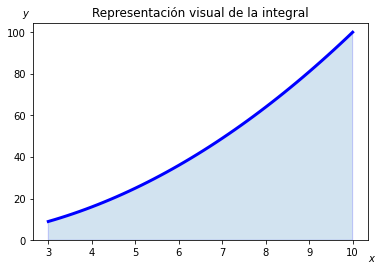


******************************************************************************************
*                               MENÚ INTEGRACIÓN NUMÉRICA                                *
******************************************************************************************
******************************************************************************************
*(A)Valor "Exacto" de la integral                                                        *
*(B)Aproximación por sumas superiores, inferiores, punto medio, a derecha y a izquierda. *
*(C)Regla del Trapecio (Con error de estimación)                                         *
*(D)Regla de Simpson (Con error de estimación)                                           *
*(E)Parábola de Riemann                                                                  *
*(F)Salir                                                                                *
*****************************************************************************************

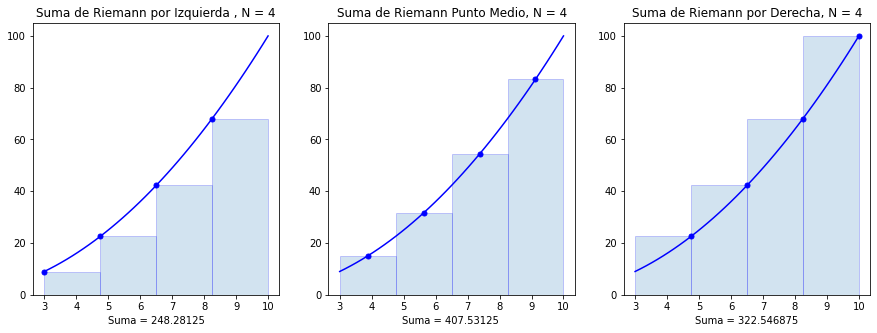


******************************************************************************************
*                               MENÚ INTEGRACIÓN NUMÉRICA                                *
******************************************************************************************
******************************************************************************************
*(A)Valor "Exacto" de la integral                                                        *
*(B)Aproximación por sumas superiores, inferiores, punto medio, a derecha y a izquierda. *
*(C)Regla del Trapecio (Con error de estimación)                                         *
*(D)Regla de Simpson (Con error de estimación)                                           *
*(E)Parábola de Riemann                                                                  *
*(F)Salir                                                                                *
*****************************************************************************************

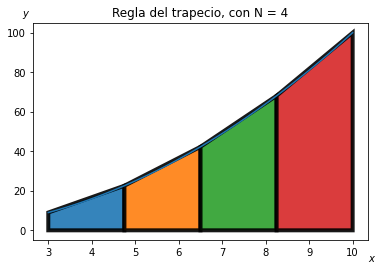

El valor de la integral por la regla del trapecio es T_4 = 327.90625
Error de estimación: 327.89523381294964

******************************************************************************************
*                               MENÚ INTEGRACIÓN NUMÉRICA                                *
******************************************************************************************
******************************************************************************************
*(A)Valor "Exacto" de la integral                                                        *
*(B)Aproximación por sumas superiores, inferiores, punto medio, a derecha y a izquierda. *
*(C)Regla del Trapecio (Con error de estimación)                                         *
*(D)Regla de Simpson (Con error de estimación)                                           *
*(E)Parábola de Riemann                                                                  *
*(F)Salir                                                              

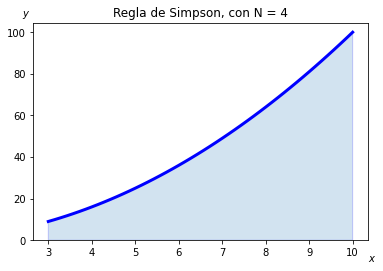

El valor de la integral por la regla de Simpson es: 324.33333333333337
Error de estimación: 0.0

******************************************************************************************
*                               MENÚ INTEGRACIÓN NUMÉRICA                                *
******************************************************************************************
******************************************************************************************
*(A)Valor "Exacto" de la integral                                                        *
*(B)Aproximación por sumas superiores, inferiores, punto medio, a derecha y a izquierda. *
*(C)Regla del Trapecio (Con error de estimación)                                         *
*(D)Regla de Simpson (Con error de estimación)                                           *
*(E)Parábola de Riemann                                                                  *
*(F)Salir                                                                           

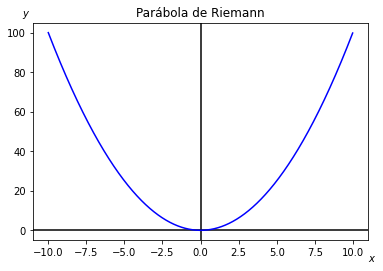


******************************************************************************************
*                               MENÚ INTEGRACIÓN NUMÉRICA                                *
******************************************************************************************
******************************************************************************************
*(A)Valor "Exacto" de la integral                                                        *
*(B)Aproximación por sumas superiores, inferiores, punto medio, a derecha y a izquierda. *
*(C)Regla del Trapecio (Con error de estimación)                                         *
*(D)Regla de Simpson (Con error de estimación)                                           *
*(E)Parábola de Riemann                                                                  *
*(F)Salir                                                                                *
*****************************************************************************************

In [17]:
init = 0
while True:
  if init == 0:
    li = data()
    init = 1
  print_welcome()
  option = input("Opcion: ")
  if option.upper() in ["A","B","C","D","E","F"]:
    if option.upper()== "A":      
      print(f'\n Valor "Exacto" de la Integral es: {valueIntegral(li[0],li[1],li[2])}')
      integralGraphics(li[0],li[1],li[2],"a",li[3])
    elif option.upper()== "B":
      print("\n")
      sRiemann(li[0],li[1],li[2],li[3])
    elif option.upper()== "C":
      print("\n")
      graphicRt(li[0],li[1],li[2],li[3])
      estimationErrorRt(li[0],li[1],li[2],li[3])
    elif option.upper()== "D":
      print("\n")
      integralGraphics(li[0],li[1],li[2],"b",li[3])
      print(f'El valor de la integral por la regla de Simpson es: {simpsRule(li[0],li[1],li[2],li[3])}')
      estimationErrorRs(li[0],li[1],li[2],li[3])
    elif option.upper()== "E":
      print("\n")
      riemannP(li[0])
    elif option.upper()== "F":
      print("Programa finalizado")
      break
  else:
    print("Opción no válida.")
    continue